In [2]:
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2032,ham,"Yes, i'm small kid.. And boost is the secret o...",NaN,NaN,NaN
2853,ham,Haha... Hope Ì_ can hear the receipt sound... ...,NaN,NaN,NaN
381,ham,"Yeah sure, give me a couple minutes to track d...",NaN,NaN,NaN
1645,ham,I.ll post her out l8r. In class,NaN,NaN,NaN
2633,ham,That's what I love to hear :V see you sundayis...,NaN,NaN,NaN


## 1. DATA CLEANING 

In [5]:
df.info()

df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


(5572, 5)

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [7]:
df.rename(columns={'v1':'target','v2':'text'},inplace= True)

In [8]:
df.sample(5)

,target,text
1752,ham,Give one miss from that number please
4990,ham,We made it! Eta at taunton is 12:30 as planned...
2720,ham,Ok lor...
1915,ham,Its not that time of the month nor mid of the ...
5079,ham,\Keep ur problems in ur heart


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df = df.drop_duplicates(keep = 'first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

## 2. EDA


In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

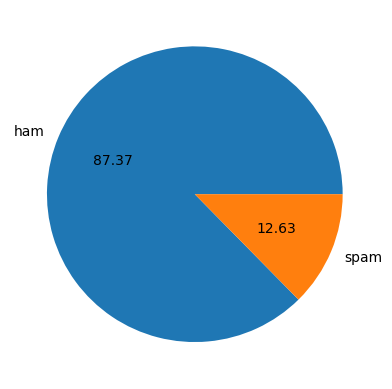

In [19]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels =['ham','spam'],autopct ='%0.2f')
plt.show()

In [20]:
!pip install nltk

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#of ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#of spam messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [30]:
import seaborn as sns 

<Figure size 1200x1000 with 0 Axes>

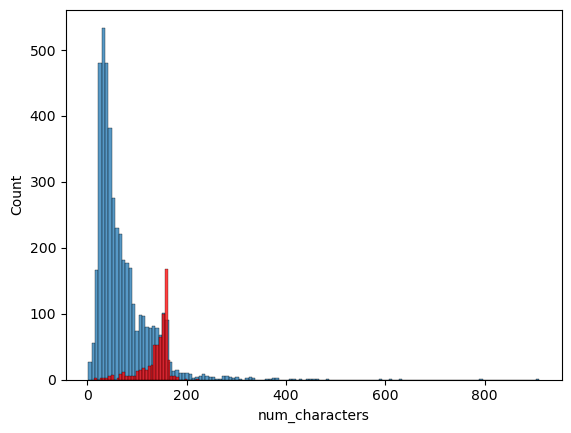

<Figure size 1200x1000 with 0 Axes>

In [31]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')
plt.figure(figsize=(12,10))

## 3. Text Preprocessing

In [32]:
def transform_text(text):
    text = text.lower()                 #Lower case
    text = nltk.word_tokenize(text)     #Tokenization
    
    y =[]
    for i in text:
        if i.isalnum():
            y.append(i)                 #Removing special characters
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)                 #Removing stopwords and punctuation
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))            #Stemming
        
    return " ".join(y)

In [33]:
nltk.download('stopwords')
from nltk.corpus import stopwords

import string
string.punctuation



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [35]:
df['transformed_text']  = df['text'].apply(transform_text)

In [36]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
%%capture
!pip install wordcloud


In [38]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height= 500, min_font_size=10 ,background_color='black')

In [39]:
spam_wc = wc.generate(df[df['target']== 1]['transformed_text'].str.cat(sep=" "))

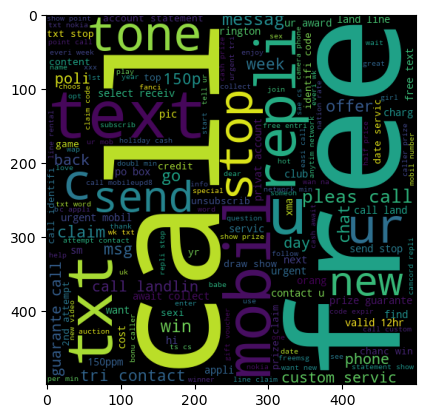

In [40]:
plt.imshow(spam_wc)

In [41]:
ham_wc = wc.generate(df[df['target']== 0]['transformed_text'].str.cat(sep=" "))

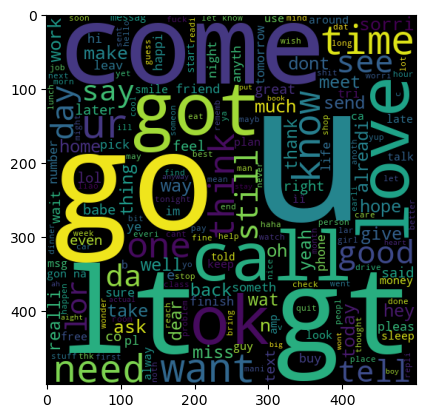

In [42]:
plt.imshow(ham_wc)

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
spam_corpus =[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [45]:
len(spam_corpus)

9939

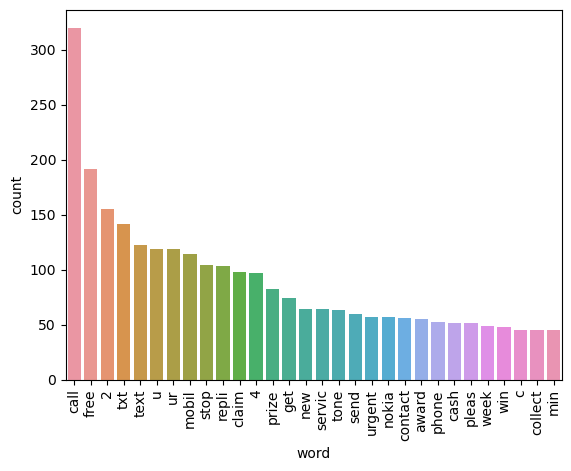

In [46]:
from collections import Counter
spam_counter = Counter(spam_corpus).most_common(30)
spam_df = pd.DataFrame(spam_counter, columns=['word', 'count'])
sns.barplot(x='word', y='count', data=spam_df)
plt.xticks(rotation='vertical')
plt.show()

In [47]:
ham_corpus =[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

35404

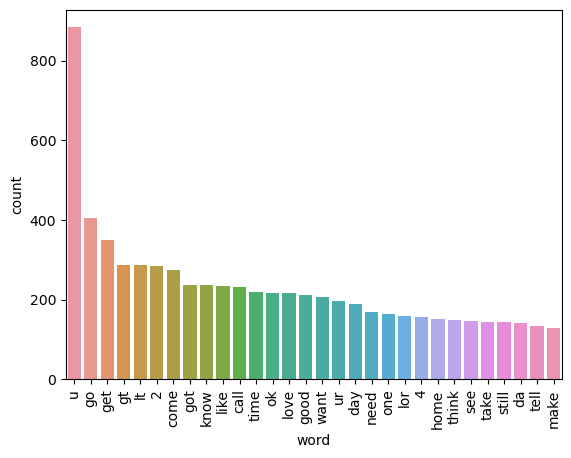

In [48]:
ham_counter = Counter(ham_corpus).most_common(30)
ham_df = pd.DataFrame(ham_counter, columns=['word', 'count'])
sns.barplot(x='word', y='count', data=ham_df)
plt.xticks(rotation='vertical')
plt.show()

## 4.MODEL BUILDING

In [49]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [138]:
# Text Vectorization 
# using Bag Of Words and TFIDF 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [139]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

#here tfidf is performing better for precision 

In [140]:
X.shape

(5169, 3000)

In [141]:
y = df['target'].values

In [142]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [143]:
from sklearn.model_selection import train_test_split


In [144]:
X_train, X_test,y_train,y_test= train_test_split(X,y,test_size =0.2,random_state=2)

In [145]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
 


In [146]:
%%capture
!pip install xgboost
from xgboost import XGBClassifier

In [147]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth= 5)
lrc = LogisticRegression(solver ='liblinear', penalty ='l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state= 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state= 2)
bc = BaggingClassifier(n_estimators = 50, random_state= 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state= 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state= 2)
xgb = XGBClassifier(n_estimators = 50, random_state= 2)

In [148]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy_score =",accuracy_score(y_test,y_pred1))
print("confusion_matrix =",confusion_matrix(y_test,y_pred1))
print("precision_score =",precision_score(y_test,y_pred1))

accuracy_score = 0.8694390715667312
confusion_matrix = [[788 108]
 [ 27 111]]
precision_score = 0.5068493150684932


In [149]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy_score =",accuracy_score(y_test,y_pred2))
print("confusion_matrix =",confusion_matrix(y_test,y_pred2))
print("precision_score =",precision_score(y_test,y_pred2))

accuracy_score = 0.9709864603481625
confusion_matrix = [[896   0]
 [ 30 108]]
precision_score = 1.0


In [150]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy_score =",accuracy_score(y_test,y_pred3))
print("confusion_matrix =",confusion_matrix(y_test,y_pred3))
print("precision_score =",precision_score(y_test,y_pred3))

accuracy_score = 0.9835589941972921
confusion_matrix = [[895   1]
 [ 16 122]]
precision_score = 0.991869918699187


In [151]:
clfs ={
    'SVC': svc,
    'KN': knc,
    'GNB' : gnb,
    'BNB' : bnb,
    'MNB': mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'Adaboost' : abc, 
    'BgC' : bc,
    'GBDT' : gbdt,
    'ETC' : etc,
    'xgb' : xgb
}

In [152]:
#defining classifiers for training 

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision= precision_score(y_test,y_pred)
    
    return accuracy,precision
    

In [153]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [154]:
from sklearn.metrics import accuracy_score, precision_score

accuracy_scores =[]
precision_scores =[]

for name,clf in clfs.items():
    current_accuracy , current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print('For',name)
    print('Accuracy =',current_accuracy)
    print('Precision =',current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

    


For SVC
Accuracy = 0.9758220502901354
Precision = 0.9747899159663865
For KN
Accuracy = 0.9052224371373307
Precision = 1.0
For GNB
Accuracy = 0.8694390715667312
Precision = 0.5068493150684932
For BNB
Accuracy = 0.9835589941972921
Precision = 0.991869918699187
For MNB
Accuracy = 0.9709864603481625
Precision = 1.0
For DT
Accuracy = 0.9303675048355899
Precision = 0.8367346938775511
For LR
Accuracy = 0.9584139264990329
Precision = 0.9702970297029703
For RF
Accuracy = 0.9758220502901354
Precision = 0.9829059829059829
For Adaboost
Accuracy = 0.960348162475822
Precision = 0.9292035398230089
For BgC
Accuracy = 0.9584139264990329
Precision = 0.8682170542635659
For GBDT
Accuracy = 0.9468085106382979
Precision = 0.9191919191919192
For ETC
Accuracy = 0.9748549323017408
Precision = 0.9745762711864406
For xgb
Accuracy = 0.9671179883945842
Precision = 0.9262295081967213


In [155]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [156]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
4,MNB,0.970986,1.000000
3,BNB,0.983559,0.991870
7,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
11,ETC,0.974855,0.974576
6,LR,0.958414,0.970297
8,Adaboost,0.960348,0.929204
12,xgb,0.967118,0.926230
10,GBDT,0.946809,0.919192


In [157]:
performance_df1 = pd.melt(performance_df ,id_vars = 'Algorithm')

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


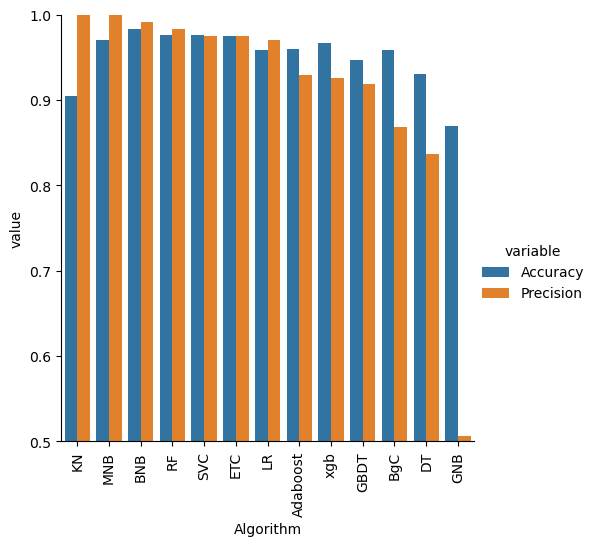

In [158]:
sns.catplot(x= 'Algorithm' , y ='value', hue='variable' , data= performance_df1 ,kind ='bar', height = 5)
plt.ylim(0.5,1.0)
plt.xticks(rotation ='vertical')
plt.show()

In [159]:
import pickle

In [160]:
pickle.dump(tfidf,open('vectorizer.pkl', 'wb'))
pickle.dump(mnb,open('model.pkl', 'wb'))

In [ ]:
#>>>>>>>>>>>>>>>>#